# Decomposition

Of cloud fluxes for a given field variable $\phi$

$$\overline{w'\chi'} = a\overline{w''\phi''}^c + (1-a)\overline{w''\phi''}^e +M_c(\overline{\phi}^c - \overline{\phi}^e)$$
where 
$$ M_c =  a(1-a)(\overline{w}^c - \overline{w}^e)$$



## One time step



/Users/jure/opt/miniconda3/lib/python3.9/site-packages/numpy/ma/core.py:5329: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/Users/jure/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/jure/PhD/coding/tracking/cloudtracker/analysis/helper_functions.py:105: UserWarning: Warning: converting a masked element to nan.
  return np.array(m_c_values), np.array(active_cloudy_values), np.array(environment_values), np.array(total_flux_values)


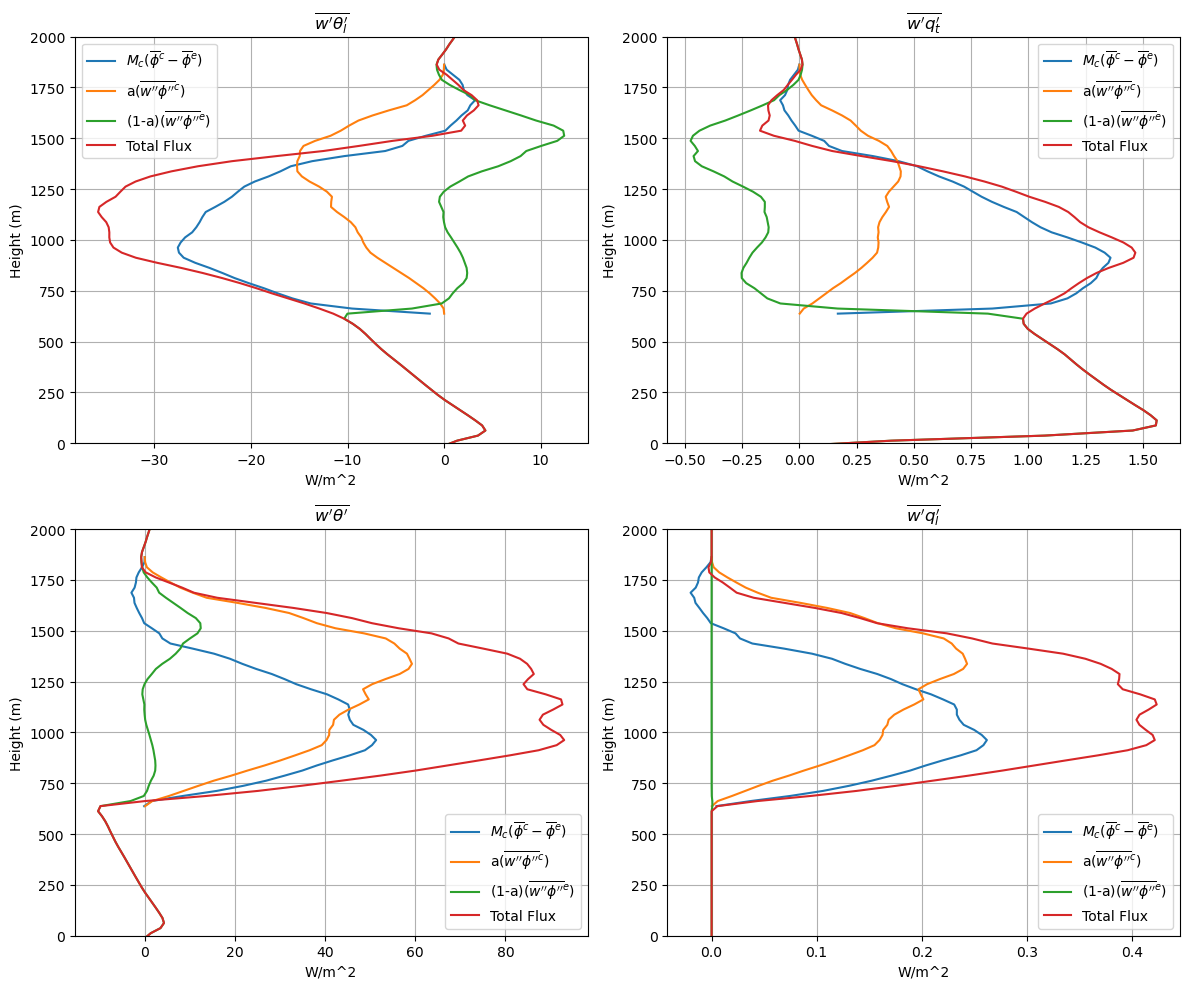

In [1]:
import matplotlib.pyplot as plt
from helper_functions import *

# Specify the timestep to analyse
timestep = 23
liquid_water_threshold = 10**(-8) #10e-6 = 10e-5 # kg/kg

# Load height values
zt_values = load_zt_values()

# Calculate m_c values for different variables
m_c_l_values, active_cloudy_l_values, environment_l_values, total_flux_l_values = calculate_m_c_for_timestep(
    timestep, 'q_l', rho_air * L_v, liquid_water_threshold)

m_c_qt_values, active_cloudy_qt_values, environment_qt_values, total_flux_qt_values = calculate_m_c_for_timestep(
    timestep, 'q_t', rho_air * L_v, liquid_water_threshold)

m_c_theta_l_values, active_cloudy_theta_l_values, environment_theta_l_values, total_flux_theta_l_values = calculate_m_c_for_timestep(
    timestep, 'theta_l', rho_air * c_p, liquid_water_threshold)

m_c_theta_values, active_cloudy_theta_values, environment_theta_values, total_flux_theta_values = calculate_m_c_for_timestep(
    timestep, 'theta', rho_air * c_p, liquid_water_threshold)

# Plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

plot_with_additional_lines(ax1, m_c_theta_l_values, active_cloudy_theta_l_values, environment_theta_l_values, total_flux_theta_l_values, r'$\overline{w^{\prime}\theta_l^{\prime}}$', zt_values)
plot_with_additional_lines(ax2, m_c_qt_values, active_cloudy_qt_values, environment_qt_values, total_flux_qt_values, r'$\overline{w^{\prime}q_t^{\prime}}$', zt_values)
plot_with_additional_lines(ax3, m_c_theta_values, active_cloudy_theta_values, environment_theta_values, total_flux_theta_values, r'$\overline{w^{\prime}\theta^{\prime}}$', zt_values)
plot_with_additional_lines(ax4, m_c_l_values, active_cloudy_l_values, environment_l_values, total_flux_l_values, r'$\overline{w^{\prime}q_l^{\prime}}$', zt_values)

plt.tight_layout()
plt.show()


## Averaging over multiple timesteps

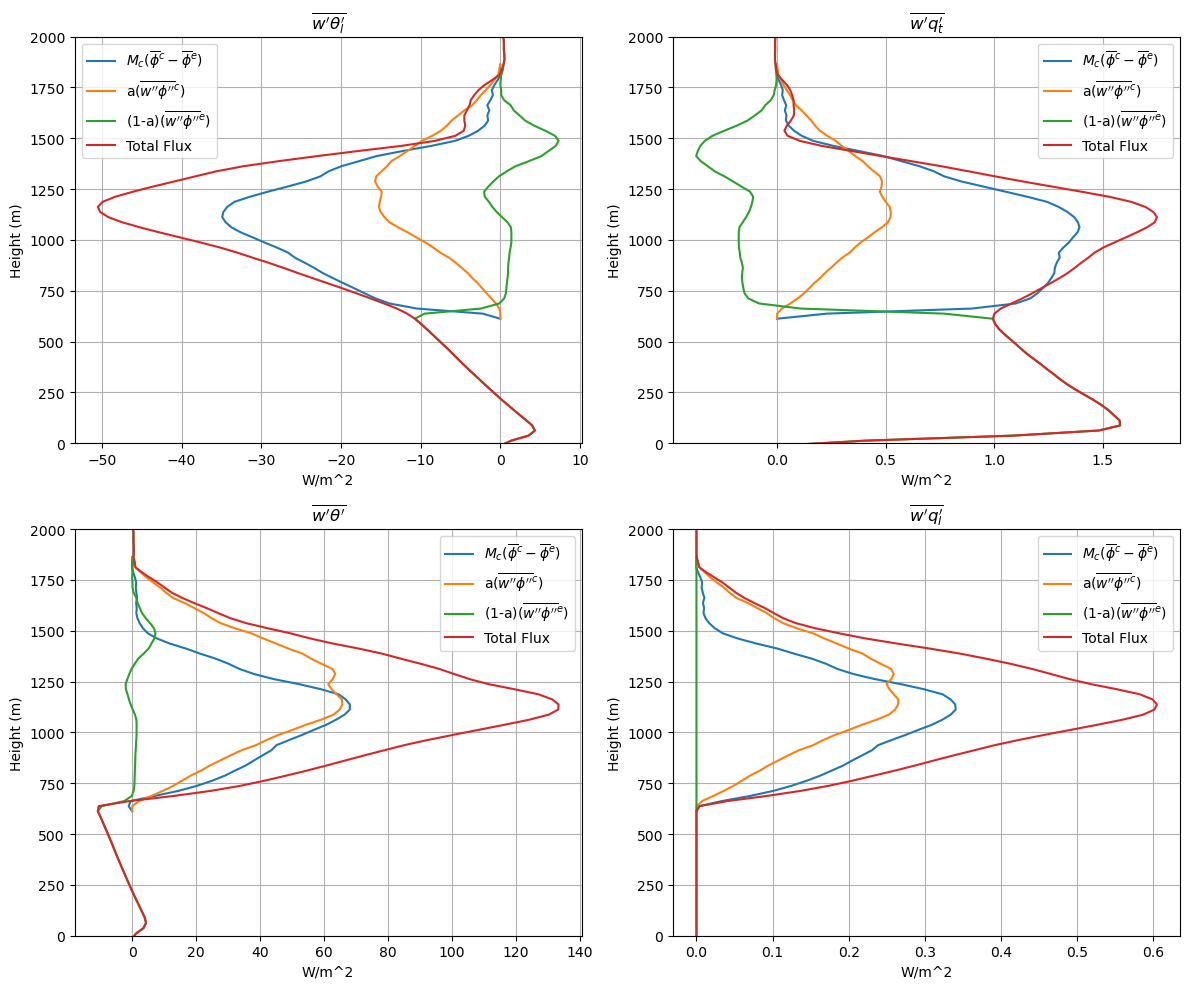

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from helper_functions import *

# Specify the range of timesteps to analyze
timesteps = range(25, 27)  # Example range of timesteps
liquid_water_threshold = 10**(-9) # kg/kg

# Load height values
zt_values = load_zt_values()

# Initialize lists to store the accumulated sums
m_c_l_sum = np.zeros_like(zt_values)
active_cloudy_l_sum = np.zeros_like(zt_values)
environment_l_sum = np.zeros_like(zt_values)
total_flux_l_sum = np.zeros_like(zt_values)

m_c_qt_sum = np.zeros_like(zt_values)
active_cloudy_qt_sum = np.zeros_like(zt_values)
environment_qt_sum = np.zeros_like(zt_values)
total_flux_qt_sum = np.zeros_like(zt_values)

m_c_theta_l_sum = np.zeros_like(zt_values)
active_cloudy_theta_l_sum = np.zeros_like(zt_values)
environment_theta_l_sum = np.zeros_like(zt_values)
total_flux_theta_l_sum = np.zeros_like(zt_values)

m_c_theta_sum = np.zeros_like(zt_values)
active_cloudy_theta_sum = np.zeros_like(zt_values)
environment_theta_sum = np.zeros_like(zt_values)
total_flux_theta_sum = np.zeros_like(zt_values)

# Loop through each timestep, calculate, and accumulate the sums
for timestep in timesteps:
    m_c_l_values, active_cloudy_l_values, environment_l_values, total_flux_l_values = calculate_m_c_for_timestep(
        timestep, 'q_l', rho_air * L_v, liquid_water_threshold)
    m_c_qt_values, active_cloudy_qt_values, environment_qt_values, total_flux_qt_values = calculate_m_c_for_timestep(
        timestep, 'q_t', rho_air * L_v, liquid_water_threshold)
    m_c_theta_l_values, active_cloudy_theta_l_values, environment_theta_l_values, total_flux_theta_l_values = calculate_m_c_for_timestep(
        timestep, 'theta_l', rho_air * c_p, liquid_water_threshold)
    m_c_theta_values, active_cloudy_theta_values, environment_theta_values, total_flux_theta_values = calculate_m_c_for_timestep(
        timestep, 'theta', rho_air * c_p, liquid_water_threshold)

    m_c_l_sum += m_c_l_values
    active_cloudy_l_sum += active_cloudy_l_values
    environment_l_sum += environment_l_values
    total_flux_l_sum += total_flux_l_values

    m_c_qt_sum += m_c_qt_values
    active_cloudy_qt_sum += active_cloudy_qt_values
    environment_qt_sum += environment_qt_values
    total_flux_qt_sum += total_flux_qt_values

    m_c_theta_l_sum += m_c_theta_l_values
    active_cloudy_theta_l_sum += active_cloudy_theta_l_values
    environment_theta_l_sum += environment_theta_l_values
    total_flux_theta_l_sum += total_flux_theta_l_values

    m_c_theta_sum += m_c_theta_values
    active_cloudy_theta_sum += active_cloudy_theta_values
    environment_theta_sum += environment_theta_values
    total_flux_theta_sum += total_flux_theta_values

# Calculate the averages
num_timesteps = len(timesteps)

m_c_l_avg = m_c_l_sum / num_timesteps
active_cloudy_l_avg = active_cloudy_l_sum / num_timesteps
environment_l_avg = environment_l_sum / num_timesteps
total_flux_l_avg = total_flux_l_sum / num_timesteps

m_c_qt_avg = m_c_qt_sum / num_timesteps
active_cloudy_qt_avg = active_cloudy_qt_sum / num_timesteps
environment_qt_avg = environment_qt_sum / num_timesteps
total_flux_qt_avg = total_flux_qt_sum / num_timesteps

m_c_theta_l_avg = m_c_theta_l_sum / num_timesteps
active_cloudy_theta_l_avg = active_cloudy_theta_l_sum / num_timesteps
environment_theta_l_avg = environment_theta_l_sum / num_timesteps
total_flux_theta_l_avg = total_flux_theta_l_sum / num_timesteps

m_c_theta_avg = m_c_theta_sum / num_timesteps
active_cloudy_theta_avg = active_cloudy_theta_sum / num_timesteps
environment_theta_avg = environment_theta_sum / num_timesteps
total_flux_theta_avg = total_flux_theta_sum / num_timesteps

# Plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

plot_with_additional_lines(ax1, m_c_theta_l_avg, active_cloudy_theta_l_avg, environment_theta_l_avg, total_flux_theta_l_avg, r'$\overline{w^{\prime}\theta_l^{\prime}}$', zt_values)
plot_with_additional_lines(ax2, m_c_qt_avg, active_cloudy_qt_avg, environment_qt_avg, total_flux_qt_avg, r'$\overline{w^{\prime}q_t^{\prime}}$', zt_values)
plot_with_additional_lines(ax3, m_c_theta_avg, active_cloudy_theta_avg, environment_theta_avg, total_flux_theta_avg, r'$\overline{w^{\prime}\theta^{\prime}}$', zt_values)
plot_with_additional_lines(ax4, m_c_l_avg, active_cloudy_l_avg, environment_l_avg, total_flux_l_avg, r'$\overline{w^{\prime}q_l^{\prime}}$', zt_values)

plt.tight_layout()
plt.show()


# Sensitivity of the liquid water threshold

1.2589254117941661e-06
1.122018454301963e-08
1e-10


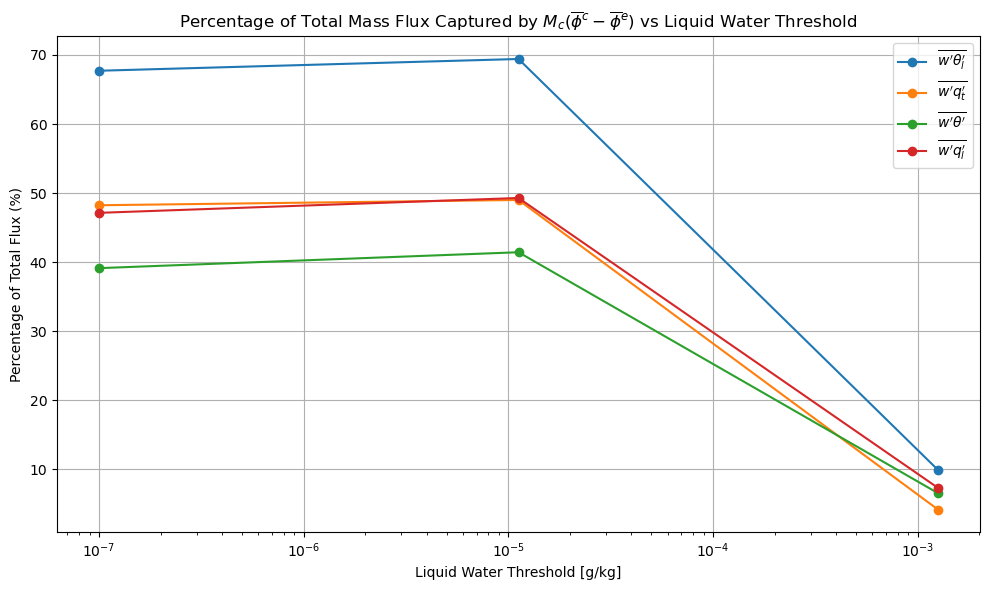

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from helper_functions import *

# Specify the range of timesteps to analyze
timesteps = range(24, 25)  # Example range of timesteps

# Specify the liquid water thresholds
thresholds = np.logspace(-5.9, -10.0, num=3)
#[5*10e-7, 10e-7, 5*10e-8, 10e-8, 5*10e-9, 10e-9, 5*10e-10, 10e-10, 5*10e-11, 10e-11, 5*10e-12, 10e-12]

# Load height values
zt_values = load_zt_values()

# Initialize lists to store results for different thresholds
results_theta_l = []
results_qt = []
results_theta = []
results_l = []

# Loop through each threshold, calculate, and accumulate the sums
for threshold in thresholds:
    m_c_l_sum = np.zeros_like(zt_values)
    active_cloudy_l_sum = np.zeros_like(zt_values)
    environment_l_sum = np.zeros_like(zt_values)
    total_flux_l_sum = np.zeros_like(zt_values)

    m_c_qt_sum = np.zeros_like(zt_values)
    active_cloudy_qt_sum = np.zeros_like(zt_values)
    environment_qt_sum = np.zeros_like(zt_values)
    total_flux_qt_sum = np.zeros_like(zt_values)

    m_c_theta_l_sum = np.zeros_like(zt_values)
    active_cloudy_theta_l_sum = np.zeros_like(zt_values)
    environment_theta_l_sum = np.zeros_like(zt_values)
    total_flux_theta_l_sum = np.zeros_like(zt_values)

    m_c_theta_sum = np.zeros_like(zt_values)
    active_cloudy_theta_sum = np.zeros_like(zt_values)
    environment_theta_sum = np.zeros_like(zt_values)
    total_flux_theta_sum = np.zeros_like(zt_values)

    for timestep in timesteps:
        m_c_l_values, active_cloudy_l_values, environment_l_values, total_flux_l_values = calculate_m_c_for_timestep(
            timestep, 'q_l', rho_air * L_v, threshold)
        m_c_qt_values, active_cloudy_qt_values, environment_qt_values, total_flux_qt_values = calculate_m_c_for_timestep(
            timestep, 'q_t', rho_air * L_v, threshold)
        m_c_theta_l_values, active_cloudy_theta_l_values, environment_theta_l_values, total_flux_theta_l_values = calculate_m_c_for_timestep(
            timestep, 'theta_l', rho_air * c_p, threshold)
        m_c_theta_values, active_cloudy_theta_values, environment_theta_values, total_flux_theta_values = calculate_m_c_for_timestep(
            timestep, 'theta', rho_air * c_p, threshold)

        m_c_l_sum += m_c_l_values
        active_cloudy_l_sum += active_cloudy_l_values
        environment_l_sum += environment_l_values
        total_flux_l_sum += total_flux_l_values

        m_c_qt_sum += m_c_qt_values
        active_cloudy_qt_sum += active_cloudy_qt_values
        environment_qt_sum += environment_qt_values
        total_flux_qt_sum += total_flux_qt_values

        m_c_theta_l_sum += m_c_theta_l_values
        active_cloudy_theta_l_sum += active_cloudy_theta_l_values
        environment_theta_l_sum += environment_theta_l_values
        total_flux_theta_l_sum += total_flux_theta_l_values

        m_c_theta_sum += m_c_theta_values
        active_cloudy_theta_sum += active_cloudy_theta_values
        environment_theta_sum += environment_theta_values
        total_flux_theta_sum += total_flux_theta_values

    # Calculate the averages
    num_timesteps = len(timesteps)

    m_c_l_avg = m_c_l_sum / num_timesteps
    active_cloudy_l_avg = active_cloudy_l_sum / num_timesteps
    environment_l_avg = environment_l_sum / num_timesteps
    total_flux_l_avg = total_flux_l_sum / num_timesteps

    m_c_qt_avg = m_c_qt_sum / num_timesteps
    active_cloudy_qt_avg = active_cloudy_qt_sum / num_timesteps
    environment_qt_avg = environment_qt_sum / num_timesteps
    total_flux_qt_avg = total_flux_qt_sum / num_timesteps

    m_c_theta_l_avg = m_c_theta_l_sum / num_timesteps
    active_cloudy_theta_l_avg = active_cloudy_theta_l_sum / num_timesteps
    environment_theta_l_avg = environment_theta_l_sum / num_timesteps
    total_flux_theta_l_avg = total_flux_theta_l_sum / num_timesteps

    m_c_theta_avg = m_c_theta_sum / num_timesteps
    active_cloudy_theta_avg = active_cloudy_theta_sum / num_timesteps
    environment_theta_avg = environment_theta_sum / num_timesteps
    total_flux_theta_avg = total_flux_theta_sum / num_timesteps

    # Calculate the percentage contribution
    percent_theta_l = (np.sum(m_c_theta_l_avg) / np.sum(total_flux_theta_l_avg)) * 100
    percent_qt = (np.sum(m_c_qt_avg) / np.sum(total_flux_qt_avg)) * 100
    percent_theta = (np.sum(m_c_theta_avg) / np.sum(total_flux_theta_avg)) * 100
    percent_l = (np.sum(m_c_l_avg) / np.sum(total_flux_l_avg)) * 100

    results_theta_l.append(percent_theta_l)
    results_qt.append(percent_qt)
    results_theta.append(percent_theta)
    results_l.append(percent_l)
    print (threshold)

# Plotting
g_per_kg_thresholds = thresholds*1000
plt.figure(figsize=(10, 6))
plt.plot(g_per_kg_thresholds, results_theta_l, label=r'$\overline{w^{\prime}\theta_l^{\prime}}$', marker='o')
plt.plot(g_per_kg_thresholds, results_qt, label=r'$\overline{w^{\prime}q_t^{\prime}}$', marker='o')
plt.plot(g_per_kg_thresholds, results_theta, label=r'$\overline{w^{\prime}\theta^{\prime}}$', marker='o')
plt.plot(g_per_kg_thresholds, results_l, label=r'$\overline{w^{\prime}q_l^{\prime}}$', marker='o')

plt.xlabel('Liquid Water Threshold [g/kg]')
plt.ylabel('Percentage of Total Flux (%)')
plt.xscale('log')
plt.legend()
plt.title('Percentage of Total Mass Flux Captured by $M_c(\\overline{\phi}^c - \\overline{\phi}^e)$ vs Liquid Water Threshold')
plt.tight_layout()
plt.grid()
plt.show()


# Further subdivision of coherent structures
## Focussing on the third term: $M_c(\overline{\phi}^c - \overline{\phi}^e)$ 

While the previous section decomposes the entire field, this sections considers further sub-decomposition of "clouds": varying definitions of what it means to be a cloud. Following other work by S&C (1993) or Gu et al (2020), we define the following cloud divisions: 

- cloud: $q_l > 0$
- cloudy updraft: $q_l >0$ & $w>0$
- cloudy downdradt: $q_l >0$ & $w<0$
- strong cloudy updraft: $q_l >0$ & $w>2$

Further work should be done by calculating buoyancy and using it as a threshold. 

/var/folders/s9/348b6n453lb4f4t0zsmgd28m0000gn/T/ipykernel_37337/1135790107.py:87: UserWarning: Warning: converting a masked element to nan.
  M_c_values = np.array(M_c_values)


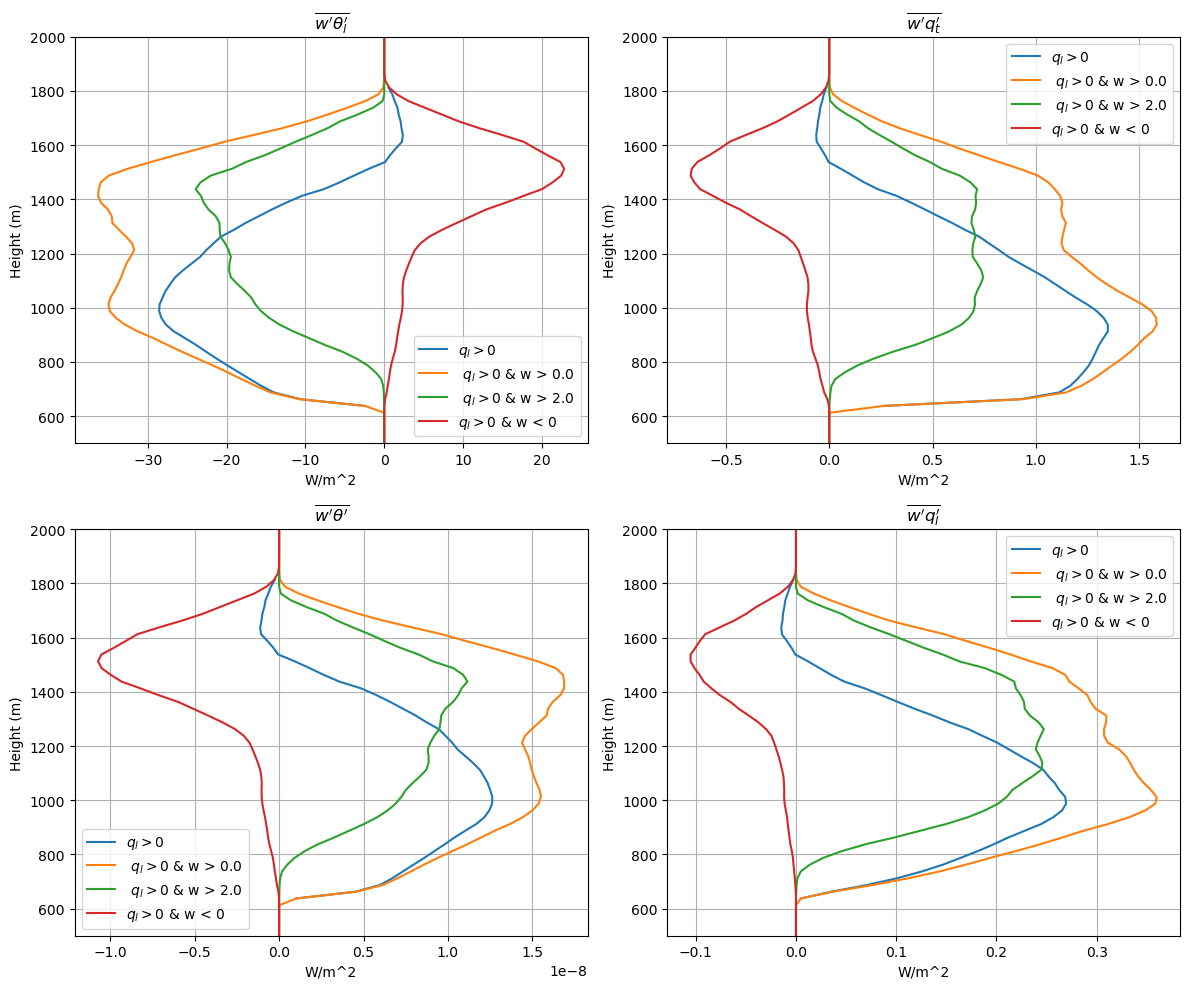

In [4]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from helper_functions import *

# Thresholds
liquid_water_threshold = 10e-10
vertical_velocity_thresholds = [0.0, 2.0]
start_timestep = 23
end_timestep = 25

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'
p_file = '/Users/jure/PhD/coding/RICO_1hr/rico.p.nc'

def load_data_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
        if var_name in ['l', 'q']:
            data = data / 1000.0
    return data


def calculate_M_c_values(w_data, l_data, variable_data, liquid_water_threshold, vertical_velocity_thresholds, multiplier):
    M_c_values = []
    M_c_values_w_thresholds = {threshold: [] for threshold in vertical_velocity_thresholds}
    M_c_values_w_neg_threshold = []

    for z in range(w_data.shape[0]):
        # Cloudy and environment masks
        cloudy_mask = l_data[z, :, :] > liquid_water_threshold
        environment_mask = ~cloudy_mask

        # Area fractions
        a = np.mean(cloudy_mask)

        # Mean vertical velocities
        w_c = np.mean(w_data[z, :, :][cloudy_mask])
        w_e = np.mean(w_data[z, :, :][environment_mask])

        # Mean variable contents
        var_c = np.mean(variable_data[z, :, :][cloudy_mask])
        var_e = np.mean(variable_data[z, :, :][environment_mask])

        # Calculate M_c
        M_c = a * (1 - a) * (w_c - w_e)

        # Multiply M_c with (var_c - var_e) and the multiplier
        result = M_c * (var_c - var_e) * multiplier

        # Append the result for the current vertical level
        M_c_values.append(result)

        # Calculate for each vertical velocity threshold
        for threshold in vertical_velocity_thresholds:
            mask = (l_data[z, :, :] > liquid_water_threshold) & (w_data[z, :, :] > threshold)
            if np.any(mask):
                a_thresh = np.mean(mask)
                w_c_thresh = np.mean(w_data[z, :, :][mask])
                w_e_thresh = np.mean(w_data[z, :, :][~mask])
                var_c_thresh = np.mean(variable_data[z, :, :][mask])
                var_e_thresh = np.mean(variable_data[z, :, :][~mask])
                M_c_thresh = a_thresh * (1 - a_thresh) * (w_c_thresh - w_e_thresh)
                result_thresh = M_c_thresh * (var_c_thresh - var_e_thresh) * multiplier
            else:
                result_thresh = 0
            M_c_values_w_thresholds[threshold].append(result_thresh)

        # Calculate for w < 0 threshold
        mask_neg = (l_data[z, :, :] > liquid_water_threshold) & (w_data[z, :, :] < 0)
        if np.any(mask_neg):
            a_neg = np.mean(mask_neg)
            w_c_neg = np.mean(w_data[z, :, :][mask_neg])
            w_e_neg = np.mean(w_data[z, :, :][~mask_neg])
            var_c_neg = np.mean(variable_data[z, :, :][mask_neg])
            var_e_neg = np.mean(variable_data[z, :, :][~mask_neg])
            M_c_neg = a_neg * (1 - a_neg) * (w_c_neg - w_e_neg)
            result_neg = M_c_neg * (var_c_neg - var_e_neg) * multiplier
        else:
            result_neg = 0
        M_c_values_w_neg_threshold.append(result_neg)

    # Convert the result lists to numpy arrays
    M_c_values = np.array(M_c_values)
    for threshold in vertical_velocity_thresholds:
        M_c_values_w_thresholds[threshold] = np.array(M_c_values_w_thresholds[threshold])
    M_c_values_w_neg_threshold = np.array(M_c_values_w_neg_threshold)

    return M_c_values, M_c_values_w_thresholds, M_c_values_w_neg_threshold

def average_M_c_values_over_time(start_timestep, end_timestep, variable_data_loader, multiplier):
    M_c_values_total = None
    M_c_values_w_thresholds_total = {threshold: None for threshold in vertical_velocity_thresholds}
    M_c_values_w_neg_threshold_total = None

    for timestep in range(start_timestep, end_timestep):
        w_data = load_data_all_levels(w_file, 'w', timestep)
        l_data = load_data_all_levels(l_file, 'l', timestep)
        variable_data = variable_data_loader(timestep)

        M_c_values, M_c_values_w_thresholds, M_c_values_w_neg_threshold = calculate_M_c_values(
            w_data, l_data, variable_data, liquid_water_threshold, vertical_velocity_thresholds, multiplier
        )

        if M_c_values_total is None:
            M_c_values_total = M_c_values
            M_c_values_w_neg_threshold_total = M_c_values_w_neg_threshold
            for threshold in vertical_velocity_thresholds:
                M_c_values_w_thresholds_total[threshold] = M_c_values_w_thresholds[threshold]
        else:
            M_c_values_total += M_c_values
            M_c_values_w_neg_threshold_total += M_c_values_w_neg_threshold
            for threshold in vertical_velocity_thresholds:
                M_c_values_w_thresholds_total[threshold] += M_c_values_w_thresholds[threshold]

    num_timesteps = end_timestep - start_timestep
    M_c_values_total /= num_timesteps
    M_c_values_w_neg_threshold_total /= num_timesteps
    for threshold in vertical_velocity_thresholds:
        M_c_values_w_thresholds_total[threshold] /= num_timesteps

    return M_c_values_total, M_c_values_w_thresholds_total, M_c_values_w_neg_threshold_total

def plot_M_c_values(ax, M_c_values, M_c_values_w_thresholds, M_c_values_w_neg_threshold, title):
    ax.plot(M_c_values, zt_values, label='$q_l >0$')
    for threshold in vertical_velocity_thresholds:
        ax.plot(M_c_values_w_thresholds[threshold], zt_values, label=f' $q_l>0$ & w > {threshold}')
    ax.plot(M_c_values_w_neg_threshold, zt_values, label='$q_l > 0$ & w < 0')

    ax.set_xlabel('W/m^2')
    ax.set_ylabel('Height (m)')
    ax.set_title(title)
    ax.grid(True)
    ax.set_ylim([500, 2000])
    ax.legend()


# Load height values
zt_values = load_zt_values()

# Calculate and average M_c values for liquid water content
M_c_l_values, M_c_l_values_w_thresholds, M_c_l_values_w_neg_threshold = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: load_data_all_levels(l_file, 'l', timestep), rho_air * L_v)

# Calculate and average M_c values for total water content
M_c_qt_values, M_c_qt_values_w_thresholds, M_c_qt_values_w_neg_threshold = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: load_data_all_levels(q_file, 'q', timestep), rho_air * L_v)

# Calculate and average M_c values for liquid water potential temperature
M_c_theta_l_values, M_c_theta_l_values_w_thresholds, M_c_theta_l_values_w_neg_threshold = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: load_data_all_levels(t_file, 't', timestep), rho_air * c_p)

# Calculate and average M_c values for theta
M_c_theta_values, M_c_theta_values_w_thresholds, M_c_theta_values_w_neg_threshold = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: calculate_theta_through_theta_l(load_data_all_levels(t_file, 't', timestep), load_data_all_levels(p_file, 'p', timestep)), rho_air * c_p)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

plot_M_c_values(ax1, M_c_theta_l_values, M_c_theta_l_values_w_thresholds, M_c_theta_l_values_w_neg_threshold, r'$\overline{w^{\prime}\theta_l^{\prime}}$')
plot_M_c_values(ax2, M_c_qt_values, M_c_qt_values_w_thresholds, M_c_qt_values_w_neg_threshold, r'$\overline{w^{\prime}q_t^{\prime}}$')
plot_M_c_values(ax3, M_c_theta_values, M_c_theta_values_w_thresholds, M_c_theta_values_w_neg_threshold, r'$\overline{w^{\prime}\theta^{\prime}}$')
plot_M_c_values(ax4, M_c_l_values, M_c_l_values_w_thresholds, M_c_l_values_w_neg_threshold, r'$\overline{w^{\prime}q_l^{\prime}}$')

plt.tight_layout()
plt.show()
